# **Introducción al Análisis Multinivel - Un ejemplo**

## **Introducción**

Los modelos multinivel (también modelos lineales jerárquicos, modelos mixtos lineales generalizados, modelos anidados, modelos mixtos, coeficiente aleatorio, modelos de efectos aleatorios, modelos de parámetros aleatorios) son modelos estadísticos de parámetros que varían en más de un nivel. Estos modelos pueden ser vistos como generalizaciones de modelos lineales, aunque también pueden extender los modelos no lineales. Aunque no son nuevos, se han hecho más populares con el crecimiento del poder computacional y la disponibilidad de software.

Por ejemplo, en investigación en educación se podría requerir medir el rendimiento en escuelas que utilizan un método de aprendizaje contra escuelas que usan un método diferente. Sería un error analizar estos datos pensando que los estudiantes son muestras aleatorias simples de la población de estudiantes que aprenden bajo un método particular. Los alumnos son agrupados en clases (cursos), los cuales a su vez son agrupados en escuelas. El desempeño de los estudiantes dentro de una clase están correlacionados, como el desempeño de los estudiantes dentro de la misma escuela. Estas correlaciones deben ser representadas en el análisis para la correcta inferencia obtenida por el experimento [1].

Utilice modelo multinivel siempre que sus datos estén agrupados (o anidadas) en más de una categoría (por ejemplo, estados, países, etc.).

Los modelos multinivel permiten:

- Estudio de los efectos que varían según la entidad (o grupos).
- Estimar promedios a nivel de grupo.

Algunas de las ventajas son:

- El análisis de regresión común ignora la variación media entre las entidades.
- La regresión individual puede tener problemas de muestra y la falta de generalización.

## **Un ejemplo**

Analizaremos una encuesta escolar representativa de los jóvenes a nivel nacional. Utilizamos datos de siete cohortes de jóvenes reunidos en el primer barrido del estudio, llevado a cabo al final del último año de la escolaridad obligatoria (16-17 años).

En este ejemplo, se amplía el análisis de un solo nivel (análisis de regresión múltiple) para permitir la dependencia de las puntuaciones de los exámenes en las escuelas y para examinar el grado de variación en los logros entre escuelas. También se consideran los efectos en la consecución de varios predictores a nivel de escuela.

La variable dependiente es la puntuación total del logro académico. Cada asignatura se evalúa en una escala de 1 (máximo) a 7 (el más bajo) y, después de volver a codificar de manera que un valor numérico elevado indica un alto grado, el total se toma a través de las asignaturas.

### **Trabajar con Stata en el entorno python**

In [1]:
import stata_setup
# Debe especificar la ruta donde se encuentra instalado Stata y la versión correspondiente (se, mp)
# stata_setup.config("ruta", "version")
stata_setup.config("C:/Lucho/Software/Stata17", "se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 19 Apr 2023
Serial number: 401709310706
  Licensed to: Cayetano
               Cayetano

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


### **Cargar datos de ejemplo**

In [4]:
%%stata
use escuelas, clear
describe


. use escuelas, clear

. describe

Contains data from escuelas.dta
 Observations:         4,059                  
    Variables:             6                  27 Feb 2013 14:21
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
escuela         float   %9.0g                 id escuela
estudiante      float   %9.0g                 id estudiante
y               float   %9.0g                 Puntaje
x1              float   %9.0g                 Femenino=1
x2              float   %9.0g                 Female=1
x3              float   %10.0g     tipo       Tipo de escuela
-------------------------------------------------------------------------------
Sorted by: escuela  estudiante

. 


### **Explorar el comportamiento del puntaje individual y promedio por escuela**


. bysort escuela: egen y_mean=mean(y)

. twoway scatter y escuela, msize(tiny) || connected y_mean escuela, connect(L)
>  clwidth(thick) clcolor(black) mcolor(black) msymbol(none) || , ytitle(y)

. 


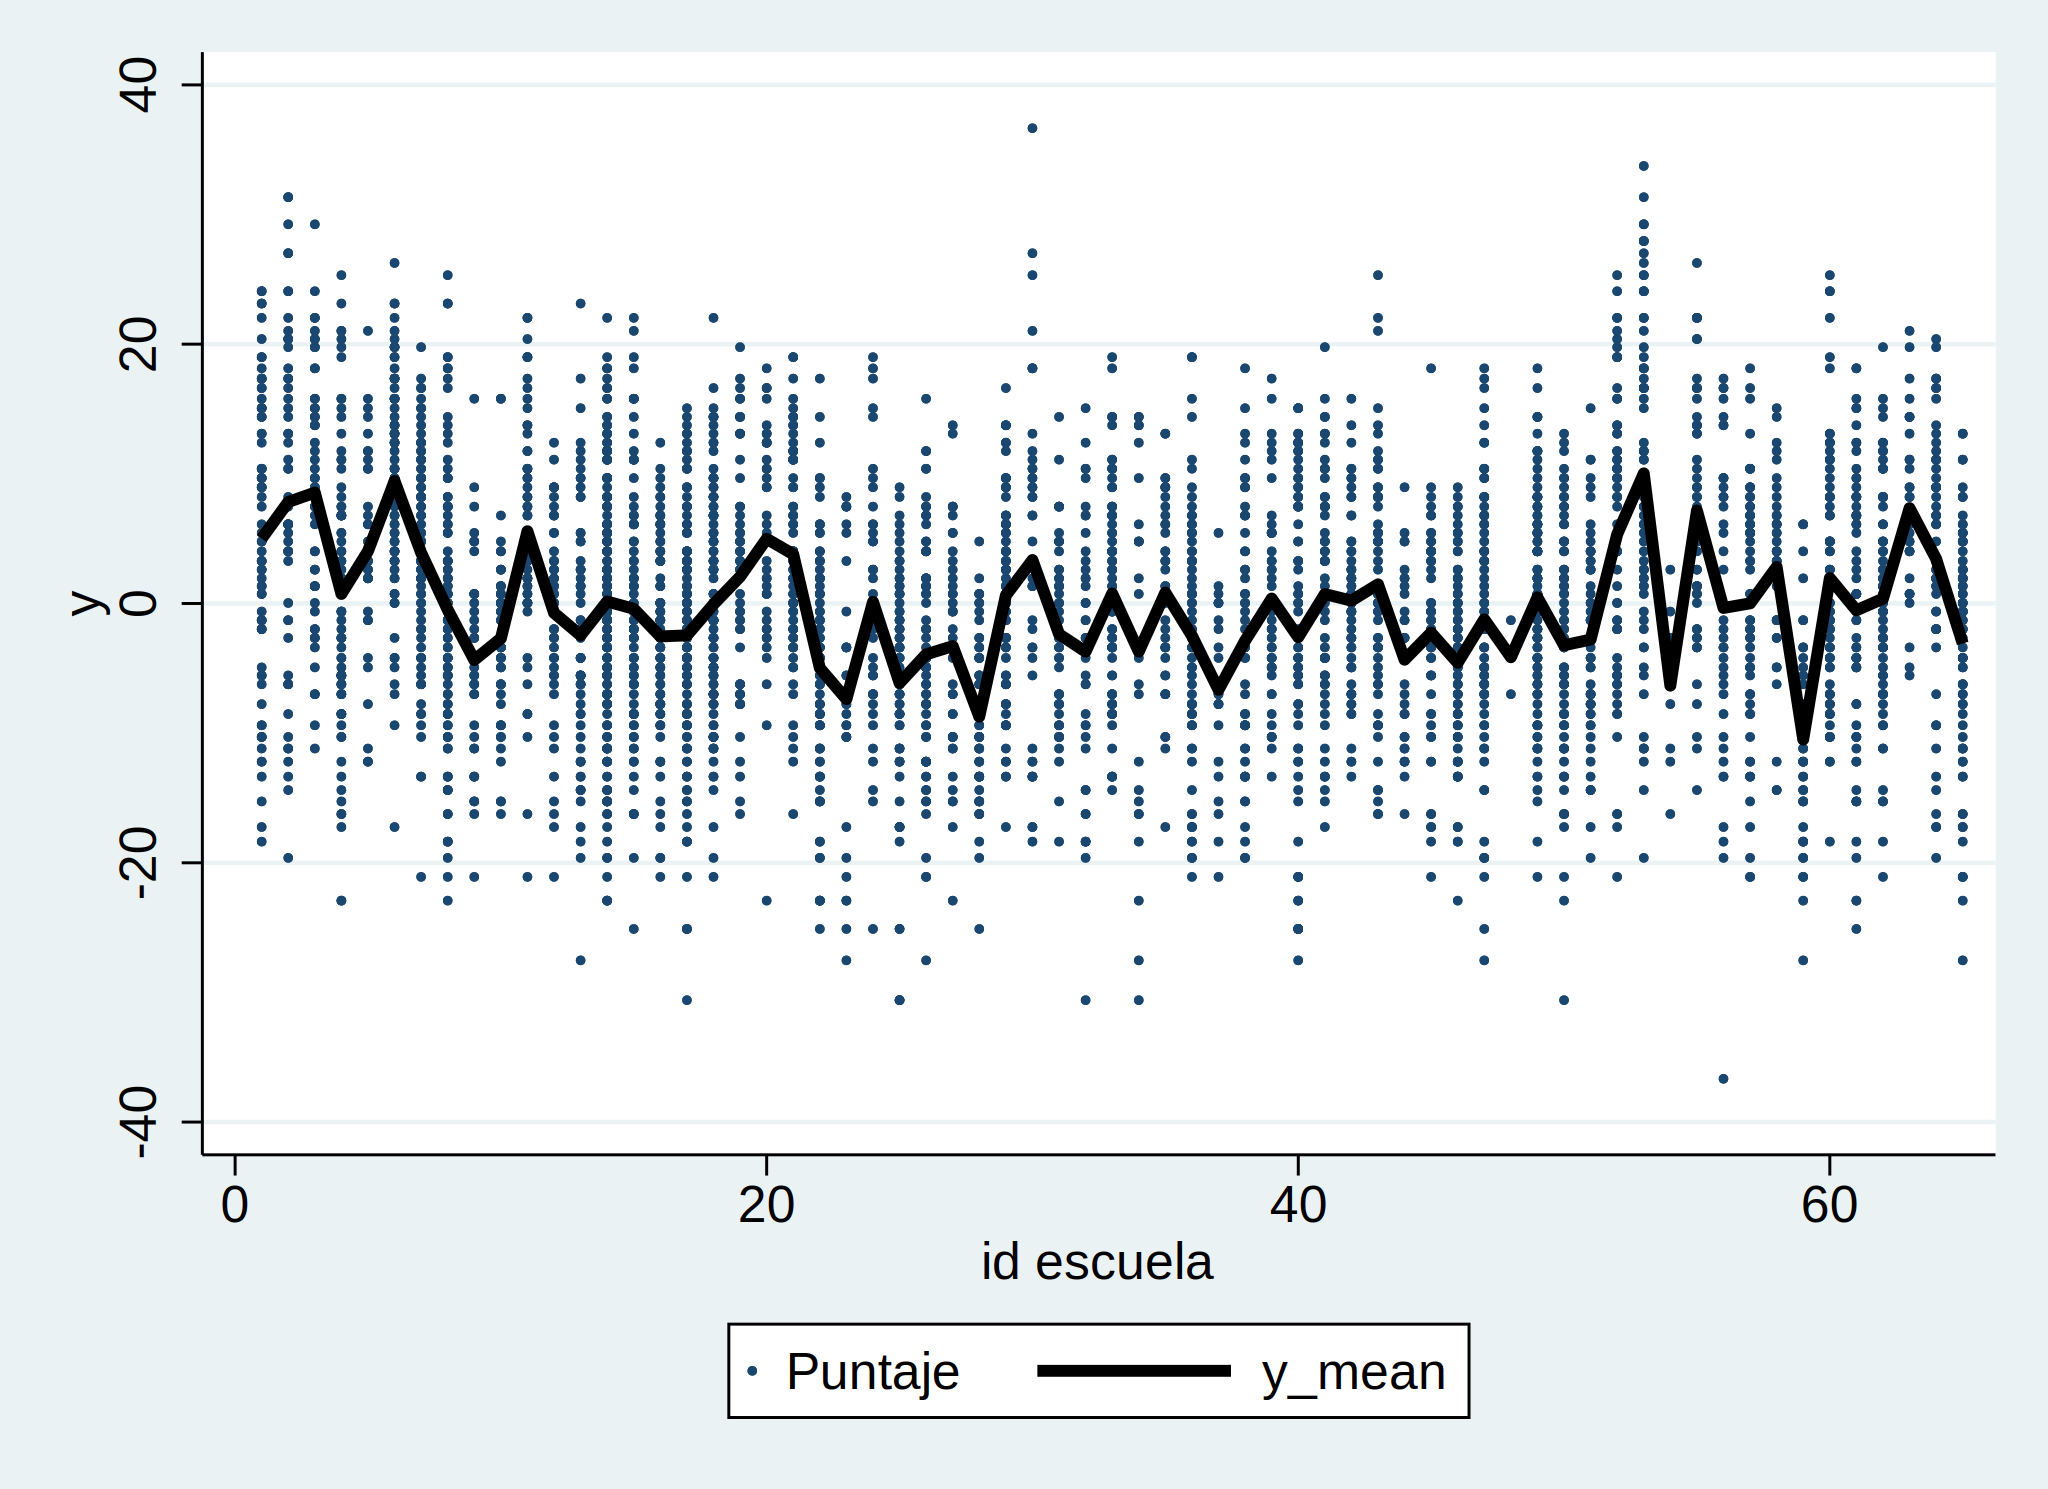

In [6]:
%%stata
bysort escuela: egen y_mean=mean(y)
twoway scatter y escuela, msize(tiny) || connected y_mean escuela, connect(L) clwidth(thick) clcolor(black) mcolor(black) msymbol(none) || , ytitle(y)

Se puede observar que, los puntajes a nivel de escuela muestran una variabilidad considerable. Además, los puntajes entre escuelas también muestran variabilidad.

Lo observado en el gráfico nos indica la necesidad de modelar los puntajes considerando su variabilidad dentro y entre las escuelas.

### **¿Cómo se comportan los puntajes en función a la condición de ser femenino?**


. quietly statsby inter=_b[_cons] slope=_b[x1], by(escuela) saving(ols, replace
> ): regress y x1

. quietly sort escuela

. quietly merge escuela using ols

. quietly drop _merge

. quietly gen yhat_ols= inter + slope*x1

. quietly sort escuela x1

. quietly separate y, by(escuela)

. quietly separate yhat_ols, by(escuela)

. twoway connected yhat_ols1-yhat_ols65 x1 || lfit y x1, clwidth(thick) clcolor
> (black) legend(off) ytitle(y)

. 
. # estos comandos se añaden para eliminar las variables y archivo creado, con 
> la finalidad de que si se ejecuta nuevamente los comandos anteriores, no de e
> rror.
Unknown #command
. drop inter-yhat_ols65

. quietly erase ols.dta

. 


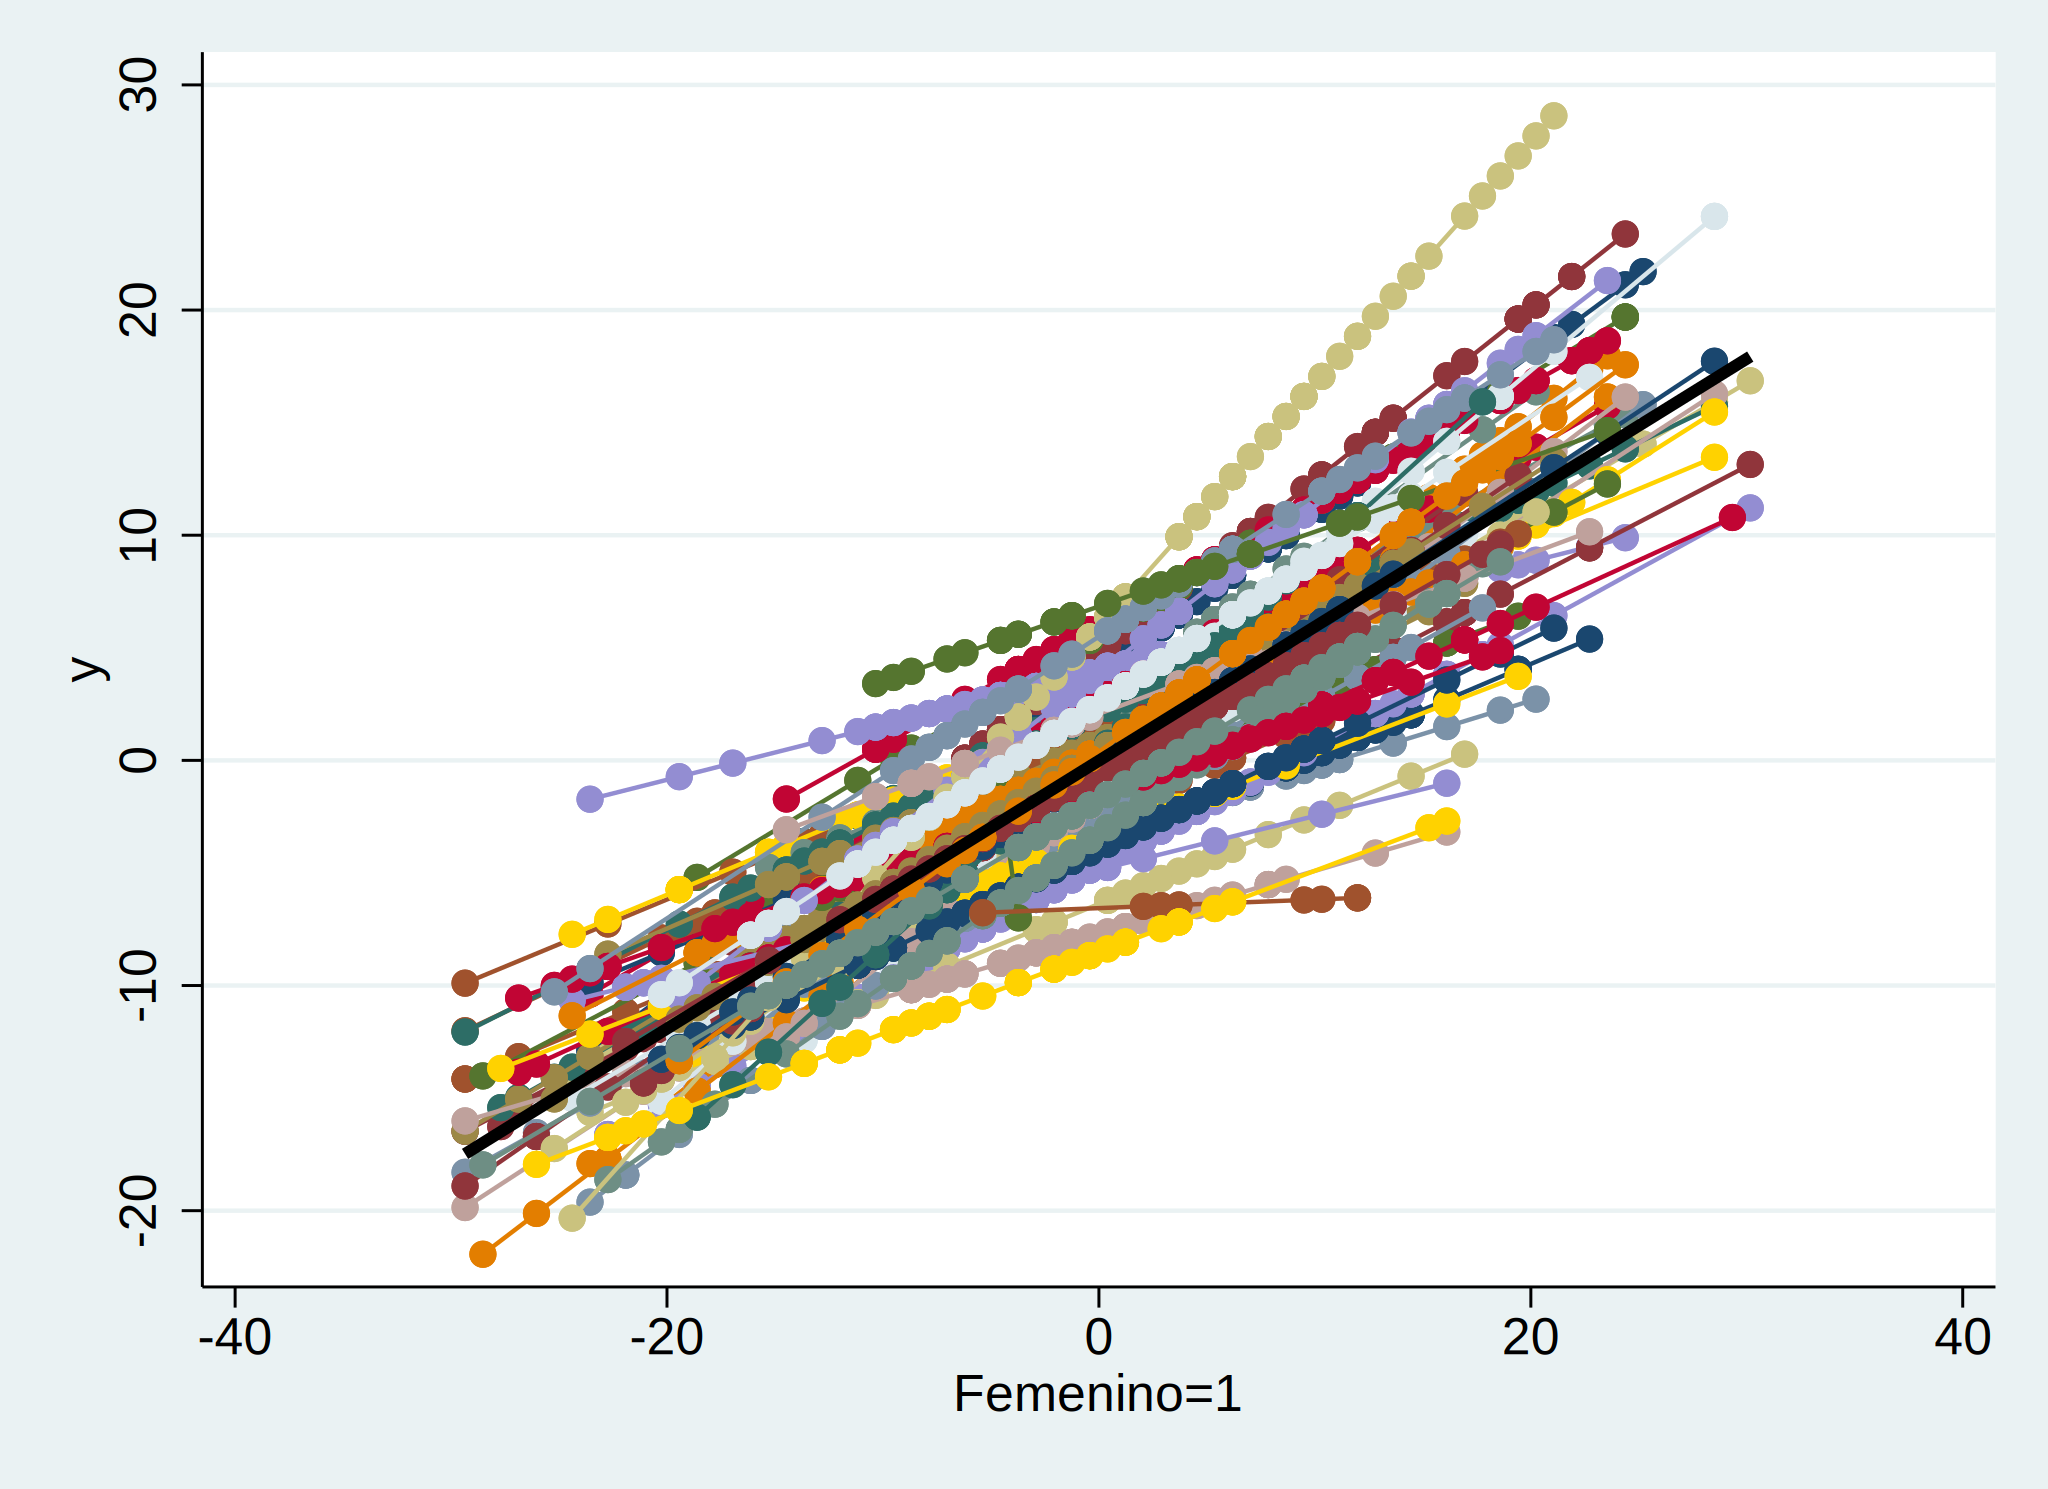

In [7]:
%%stata
quietly statsby inter=_b[_cons] slope=_b[x1], by(escuela) saving(ols, replace): regress y x1
quietly sort escuela
quietly merge escuela using ols
quietly drop _merge
quietly gen yhat_ols= inter + slope*x1
quietly sort escuela x1
quietly separate y, by(escuela)
quietly separate yhat_ols, by(escuela)
twoway connected yhat_ols1-yhat_ols65 x1 || lfit y x1, clwidth(thick) clcolor(black) legend(off) ytitle(y)

# estos comandos se añaden para eliminar las variables y archivo creado, con la finalidad de que si se ejecuta nuevamente los comandos anteriores, no de error.
drop inter-yhat_ols65
quietly erase ols.dta

El gráfico nos muestra la recta de regresión para puntaje (y) en función de la condición de ser femenino (x1), para cada grupo de estudiantes de una escuela.

Se puede observar que las rectas presentan interceptos y pendientes diferentes, por lo que estas consideraciones deben ser tomadas en cuenta en e modelamiento del puntaje (y).

### **Modelo con intercepto variable** 
**$y_{i} = \alpha_{j[i]} + \epsilon_{i}$**

In [8]:
%%stata
xtmixed y || escuela: , mle nolog


Mixed-effects ML regression                     Number of obs     =      4,059
Group variable: escuela                         Number of groups  =         65
                                                Obs per group:
                                                              min =          2
                                                              avg =       62.4
                                                              max =        198
                                                Wald chi2(0)      =          .
Log likelihood = -14851.502                     Prob > chi2       =          .

------------------------------------------------------------------------------
           y | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |  -.1317107   .5362734    -0.25   0.806    -1.182787    .9193659
------------------------------------------------------------------

### **Modelo con intercepto variable (un nivel, un predictor)**
**$y_{i} = \alpha_{j[i]} + \beta x_{i} + \epsilon_{i}$**

In [9]:
%%stata
xtmixed y x1 || escuela: , mle nolog


Mixed-effects ML regression                     Number of obs     =      4,059
Group variable: escuela                         Number of groups  =         65
                                                Obs per group:
                                                              min =          2
                                                              avg =       62.4
                                                              max =        198
                                                Wald chi2(1)      =    2042.57
Log likelihood = -14024.799                     Prob > chi2       =     0.0000

------------------------------------------------------------------------------
           y | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
          x1 |   .5633697   .0124654    45.19   0.000     .5389381    .5878014
       _cons |   .0238706   .4002255     0.06   0.952     -.760557

### **Modelo con intercepto y coeficiente variable**
**$y_{i} = \alpha_{j[i]} + \beta_{j[i]} x_{i} + \epsilon_{i}$**

In [10]:
%%stata
xtmixed y x1 || escuela: x1, mle nolog covariance(unstructure)


Mixed-effects ML regression                     Number of obs     =      4,059
Group variable: escuela                         Number of groups  =         65
                                                Obs per group:
                                                              min =          2
                                                              avg =       62.4
                                                              max =        198
                                                Wald chi2(1)      =     779.79
Log likelihood = -14004.613                     Prob > chi2       =     0.0000

------------------------------------------------------------------------------
           y | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
          x1 |    .556729   .0199368    27.92   0.000     .5176535    .5958044
       _cons |   -.115085   .3978346    -0.29   0.772    -.8948264

### **Modelo con pendiente variable**
**$y_{i} = \alpha + \beta_{j[i]} x_{i} + \epsilon_{i}$**

In [11]:
%%stata
xtmixed y x1 || _all: R.x1, mle nolog


Mixed-effects ML regression                     Number of obs     =      4,059
Group variable: _all                            Number of groups  =          1
                                                Obs per group:
                                                              min =      4,059
                                                              avg =    4,059.0
                                                              max =      4,059
                                                Wald chi2(1)      =    2186.09
Log likelihood = -14226.433                     Prob > chi2       =     0.0000

------------------------------------------------------------------------------
           y | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
          x1 |   .5950551   .0127269    46.76   0.000     .5701108    .6199995
       _cons |  -.0119479   .1263914    -0.09   0.925    -.2596706

### **Post estimación**

Para comparar los modelos se utiliza la prueba de likelihood-ration (razón de verosimilitud)

Esta prueba compara la "verosimilitud" (que se muestra en la salida) de los dos modelos y prueba si son significativamente diferentes.

In [12]:
%%stata
# Fitting random intercepts and storing results #

quietly xtmixed y x1 || escuela:, mle nolog
estimates store ri 

# Fitting random coefficients and storing results #
quietly xtmixed y x1 || escuela: x1, mle nolog covariance(unstructure)
estimates store rc 

# Running the likelihood-ratio test to compare #
lrtest ri rc

# Esta línea es solo para eliinar las variables que genera el comanso estimates, con la finalidad de poder repetir los comandos y no de error
drop _est_ri _est_rc


. # Fitting random intercepts and storing results #
Unknown #command
. 
. quietly xtmixed y x1 || escuela:, mle nolog

. estimates store ri 

. 
. # Fitting random coefficients and storing results #
Unknown #command
. quietly xtmixed y x1 || escuela: x1, mle nolog covariance(unstructure)

. estimates store rc 

. 
. # Running the likelihood-ratio test to compare #
Unknown #command
. lrtest ri rc

Likelihood-ratio test
Assumption: ri nested within rc

 LR chi2(2) =  40.37
Prob > chi2 = 0.0000

Note: The reported degrees of freedom assumes the null hypothesis is not on
      the boundary of the parameter space. If this is not true, then the
      reported test is conservative.

. 
. # Esta línea es solo para eliinar las variables que genera el comanso estimat
> es, con la finalidad de poder repetir los comandos y no de error
Unknown #command
. drop _est_ri _est_rc

. 


La hipótesis nula es que no existe diferencia significativa entre los dos modelos. Si Prob> chi2 <0.05, entonces se puede rechazar la hipótesis nula y concluir que existe una diferencia estadísticamente significativa entre los modelos. En el ejemplo anterior, rechazamos la hipótesis nula y concluimos que el modelo de coeficientes aleatorios proporciona un mejor ajuste.

#### **Estimar los efectos aleatorios**

Para estimar los efectos aleatorios $ \mu $, se utiliza el comando **predictwith** con la opción **reffects**; esto dará las mejores predicciones lineales insesgadas (BLUPs) de los efectos aleatorios, que básicamente muestran la cantidad de variación, tanto para el intercepto y el coeficiente beta estimado (s).

In [13]:
%%stata
quietly quietly xtmixed y x1 || escuela: x1, mle nolog covariance(unstructure) variance
predict u*, reffects


. quietly quietly xtmixed y x1 || escuela: x1, mle nolog covariance(unstructure
> ) variance

. predict u*, reffects

. 


El comando anterior crea las siguientes variables:

u1 “BLUP r.e. para escuela: x1” ---------------/* uβ*/

u2 “BLUP r.e. para escuela: _cons” ------------/* uα*/

Exploremos algunos resultados:

In [14]:
%%stata
bysort escuela: generate grupo=(_n==1)
list escuela u2 u1 if escuela<=10 & grupo


. bysort escuela: generate grupo=(_n==1)

. list escuela u2 u1 if escuela<=10 & grupo

      +---------------------------------+
      | escuela          u2          u1 |
      |---------------------------------|
   1. |       1    3.749336    .1249761 |
  74. |       2    4.702127    .1647271 |
 129. |       3    4.797687    .0808662 |
 181. |       4    .3502472    .1271837 |
 260. |       5    2.462807    .0720581 |
      |---------------------------------|
 295. |       6    5.183819    .0586235 |
 375. |       7    3.640948   -.1488728 |
 463. |       8   -.1218853    .0068856 |
 565. |       9   -1.767985   -.0886202 |
 599. |      10   -3.139073   -.1360777 |
      +---------------------------------+

. 


El modelo estimado para la escuela 1 es:

$ y_{i} = -0,12 + 0,56 x_{1} $ ----------------------> $ y_{i} = -0,12 + 0,56 x_{1} + \mu_{1} + \mu_{2}  $

$-0,12 + 0,56 x_{1}$ (efectos fijos)

$\mu_{1} + \mu_{2}$ (efectos aleatorios)

El modelo estimado para la escuela 1 es:

$ y_{i} = -0,12 + 0,56 x_{1} + .1249761 + 3.749336  $

$ y_{i} = (-0,12 + 3.749336) + (0,56 + .1249761) x_{1} $

$ y_{i} = 3.634251 + .6817051 x_{1} $

#### **Calcular las intercepciones y pendientes para cada escuela**

In [15]:
%%stata
gen intercepto= _b[_cons] + u2
gen pendiente = _b[x1] + u1
list escuela intercepto pendiente if escuela<=10 & grupo


. gen intercepto= _b[_cons] + u2

. gen pendiente = _b[x1] + u1

. list escuela intercepto pendiente if escuela<=10 & grupo

      +--------------------------------+
      | escuela   interce~o   pendie~e |
      |--------------------------------|
   1. |       1    3.634251   .6817051 |
  74. |       2    4.587042   .7214561 |
 129. |       3    4.682601   .6375952 |
 181. |       4    .2351622   .6839126 |
 260. |       5    2.347722   .6287871 |
      |--------------------------------|
 295. |       6    5.068734   .6153525 |
 375. |       7    3.525863   .4078562 |
 463. |       8   -.2369703   .5636146 |
 565. |       9    -1.88307   .4681087 |
 599. |      10   -3.254158   .4206513 |
      +--------------------------------+

. 


#### **Estimar los puntajes en base a los modelos estimados para cada escuela**

In [16]:
%stata predict yhat_fit, fitted 

#### **Graficando los modelos estimados para cada escuela**

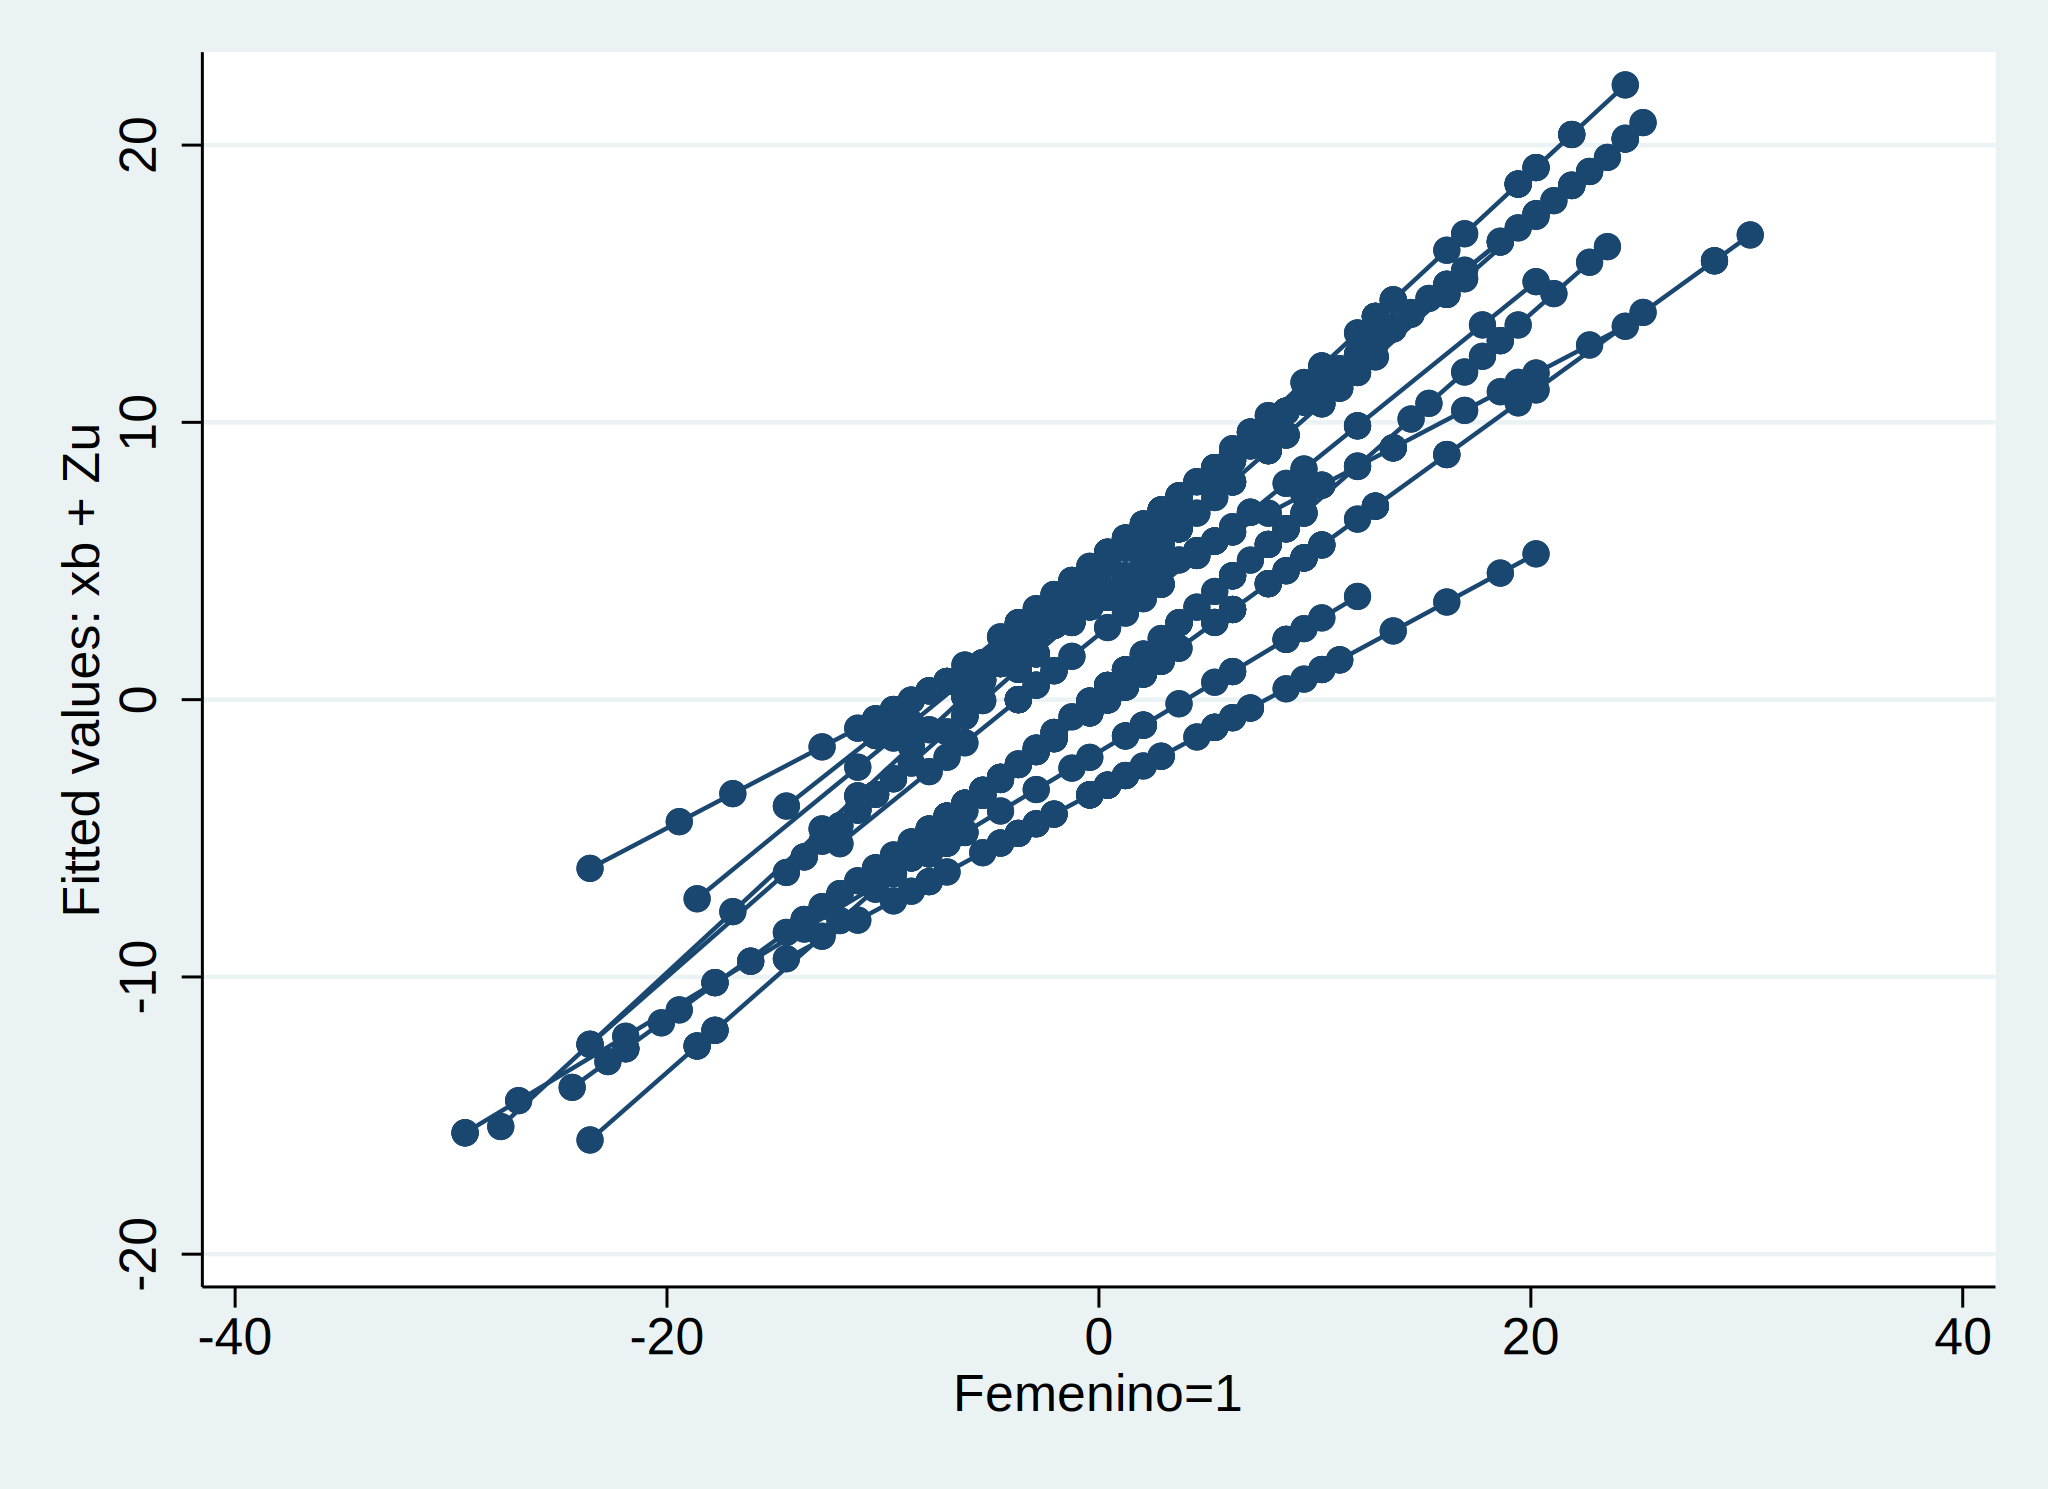

In [17]:
%stata twoway connected yhat_fit x1 if escuela<=10, connect(L)

#### **Residuos en base al modelo estimado**

In [18]:
%stata predict residuos, residuals

In [19]:
%stata predict resid_std, rstandard

#### **Revisión rápida de los residuos**

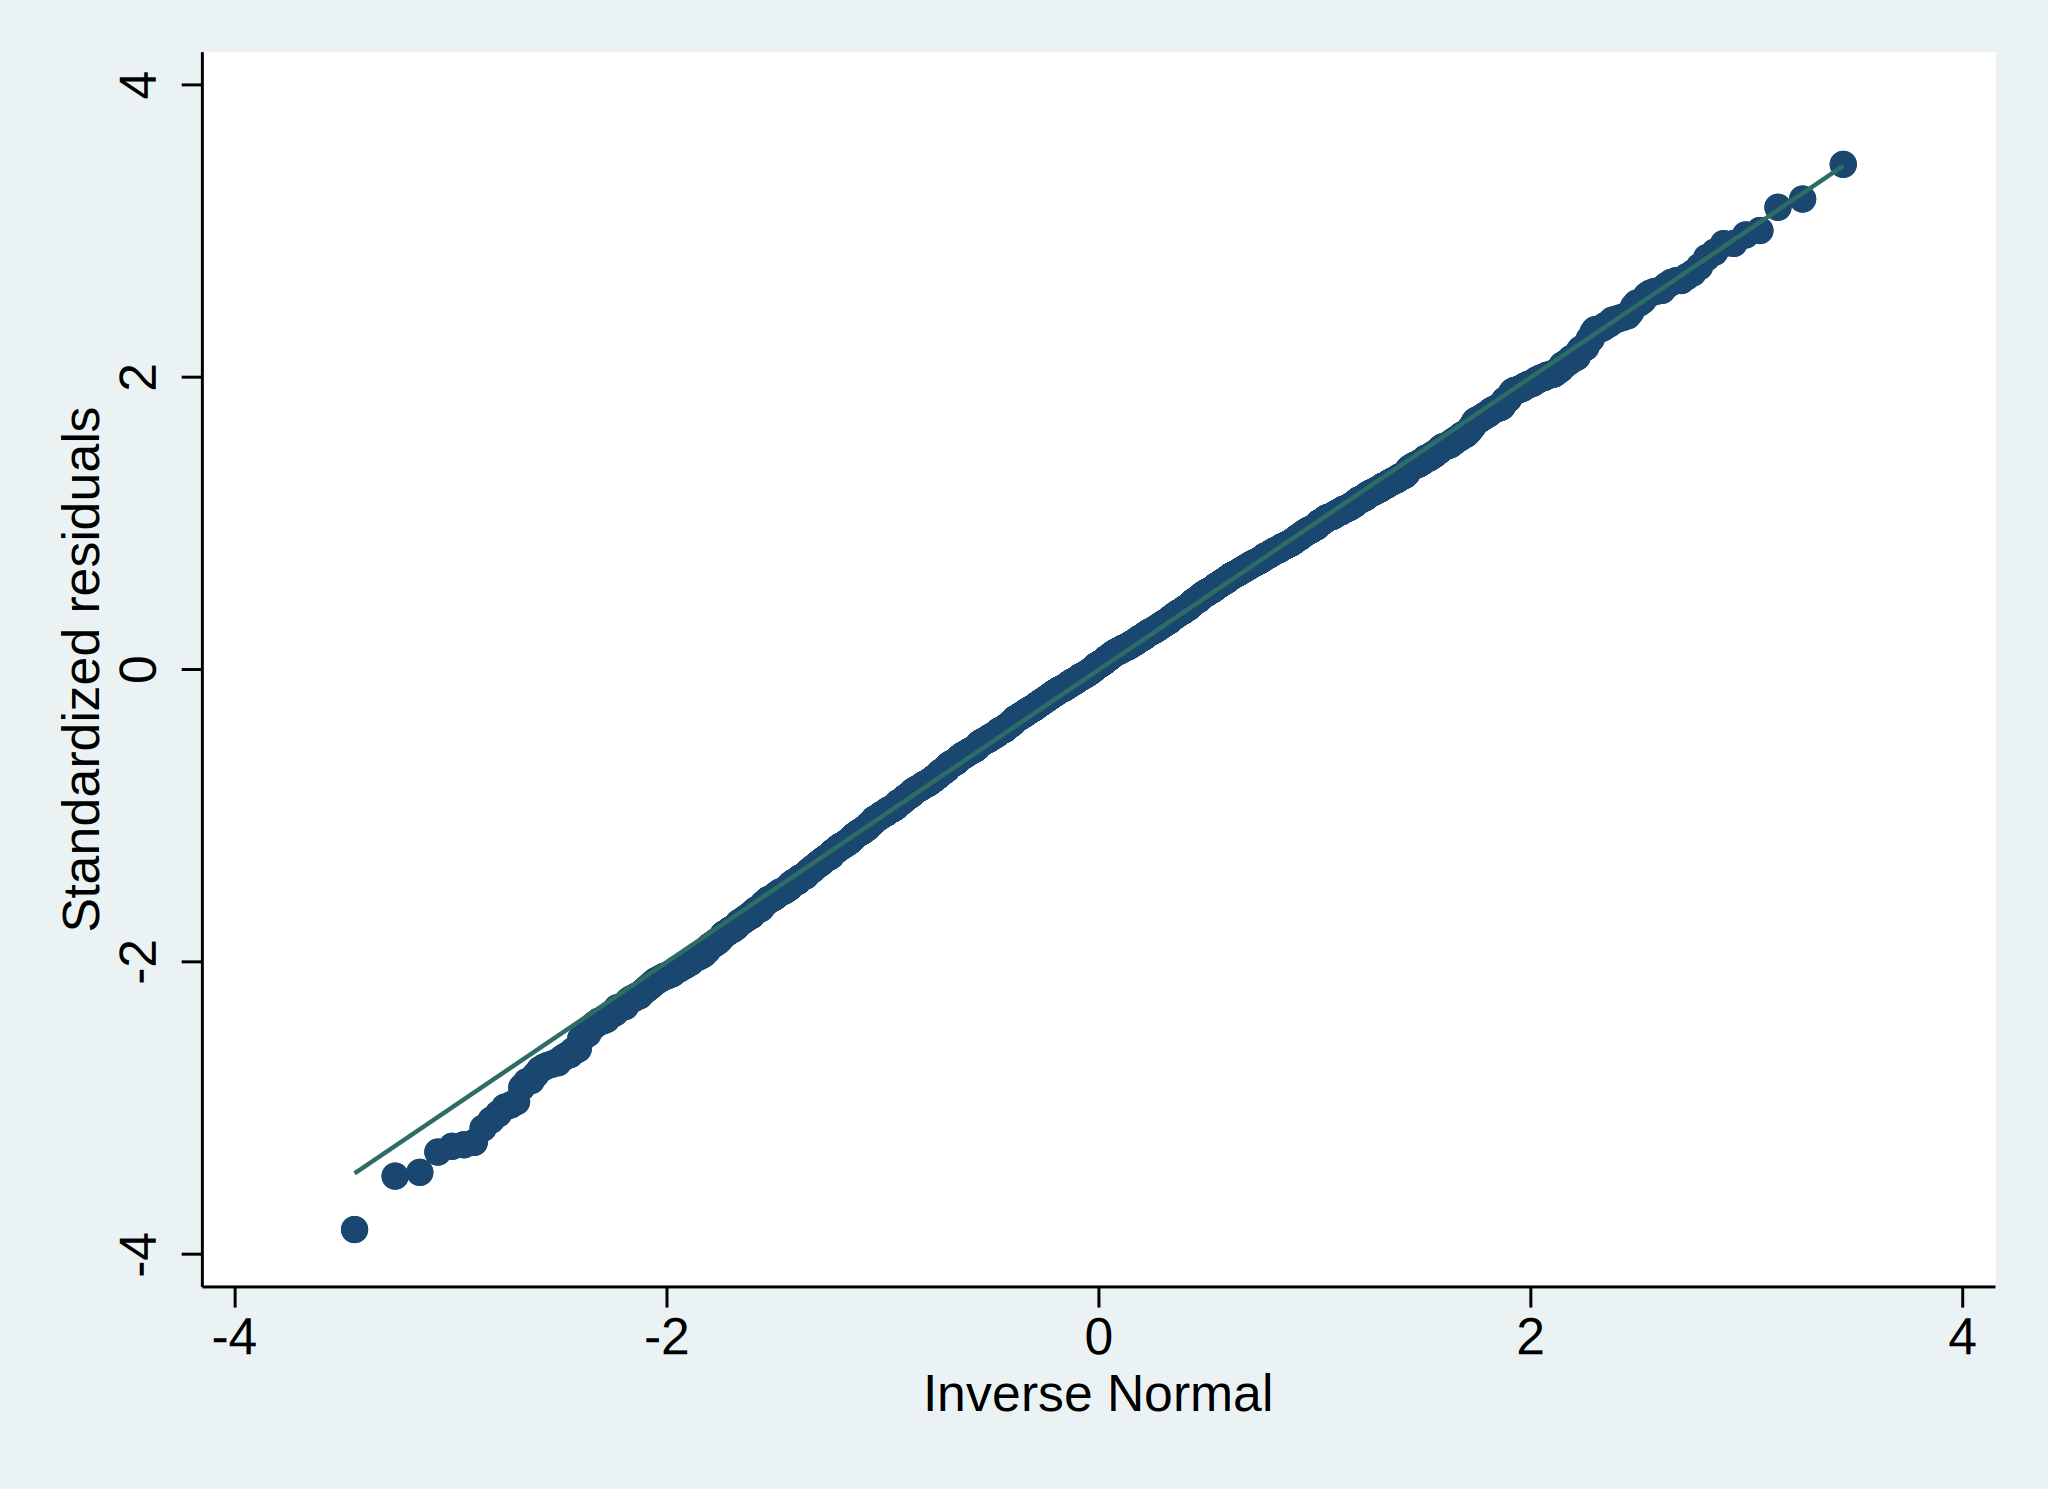

In [20]:
%stata qnorm resid_std

## Referencias

[1] Modelo multinivel. (2022, 6 de marzo). Wikipedia, La enciclopedia libre. Fecha de consulta: 17:23, julio 20, 2022 desde https://es.wikipedia.org/w/index.php?title=Modelo_multinivel&oldid=142093210.